<a href="https://colab.research.google.com/github/lucas-porto/sprint_2_mvp/blob/master/%5Cnotebooks%5CProjeto_MVP_Sprint_II_Lucas_Porto_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint II


## Modelo de Machine Learning Clássico - Classificação

### **Definição do Problema**

***Objetivo***: *entender e descrever claramente o problema que está sendo resolvido.*


*   Qual é a descrição do problema?
*   Você tem premissas ou hipóteses sobre o problema? Quais
*   Que restrições ou condições foram impostas para selecionar os dados?
*   Descreva o seu dataset (atributos, imagens, anotações, etc).



### **Preparação de Dados**

***Objetivo***: *realizar operações de preparação dos dados.*

*   Separe o dataset entre treino e teste (e validação, se aplicável).
*   Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
*   Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
* Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.


### **Modelagem e treinamento:**

***Objetivo***: *construir modelos para resolver o problema em questão.*

*   Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.
*   Há algum ajuste inicial para os hiperparâmetros?
*   O modelo foi devidamente treinado? Foi observado problema de underfitting?
*   É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.
*   Há algum método avançado ou mais complexo que possa ser avaliado?
*   Posso criar um comitê de modelos diferentes para o problema (ensembles)?

## **Avaliação de Resultados:**

***Objetivo***: *analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)*


*   Selecione as métricas de avaliação condizentes com o problema, justificando.
*   Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.
*   Os resultados fazem sentido?
*   Foi observado algum problema de overfitting?
*   Compare os resultados de diferentes modelos.
*   Descreva a melhor solução encontrada, justificando.







### **Descrição do projeto**

*   Qual é a descrição do problema?
  *   O objetivo é podermos ter uma previsão se o paciente que temos os dados pode ou não ter o risco de ser diabético. Estarei utilizando para este primeiro modelo o dataset disponível no [kaggle](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download).
*   Você tem premissas ou hipóteses sobre o problema? Quais.
  *   Dentro das nossas variáveis, talvez quem tenha problemas do coração e fume possa ter mais probabilidade de ter diabetes.
*   Que restrições ou condições foram impostas para selecionar os dados?
  *   Dados duplicados.
*   Descreva o seu dataset (atributos, imagens, anotações, etc).
  * *gender*: Refere-se a sexo do individuo.
  * *age*: Refere-se a idade do individuo, a partir dela temos a maior probabilidade de ter certas problemas de saúde.
  * *hypertension*: Refere-se se o individuo tem problemas de hipertensão, que é uma condição de saúde onde a pressão arterial é elevada nas artérias.
  * *heart_disease*: Refere-se se o individuo possuir algum problema no coração, como do doença da artéria coronária, insuficiência cardíaca ou
distúrbios do ritmo cardíaco.
  * *smoking_history*: Refere-se se o individuo tem histórico de ter sido fumante.
  * *bmi*: Refere-se ao Índice de Massa Corporal (Body Mass Index), um índice que é usado mundialmente para verificar se o indivíduo está dentro de um padrão de massa corporal.
  * *HbA1c_level*: Refere-se a hemoglobina glicada, um exame de sangue que avalia o nível de glicemia e é acompanhado em pacientes com diabetes.
  * *blood_glucose_level*: Refere-se ao nível de nível de concentração de glicose no sangue.
  * *diabetes*: Refere-se o target do nosso problema que é se o individuo é diabético ou não.

### **Resumo do projeto**

- Na fase de tratamento, realizamos a retirada dos dados duplicados.
- Criado o tratamento dos dados em texto com o LabelEncoder.
- Criado o tratamento da target para dado binário.
- Separação de dados de treino 75% da base e teste 25% da base.
- Criamos uma validação cruzada com 10 folds, estratificando nossos dados pela proporção entre os valores da nossa target.
- Utilizada a métrica f1 que é um balancemaneto entre nossa acurácia e recall, já que nossa ideia é errar menos quando informamos a um paciente que ele pode ou não ser diabético. Nosso recall deve ser diminuído.
- Não usado redução de dimensionalidade já que a quantidade reduzida era próxima a das variáveis.
- Testado 10 modelos em 3 tratamentos de dados diferentes:
  - sem tratamento
  - padronizado
  - normalizado
- GradientBoostingClassifier escolhido por ser o melhor F1 e menor desvio padrão.
- Busca de hyperparâmertros foi realizada via optuna, onde notamos que o número de estimadores e learning rate foram os parâmetros que mais fizeram diferença nos resultados.
- **Resultado final no teste foi de F1 de 81% e acurácia de 97%**

### **Imports**

#### Instalando biblioteca usada para otimizar a busca pelos hiperparâmetros

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.4 MB/s eta 0:00:00


#### Bibliotecas

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.pipeline import Pipeline

#optuna
import optuna
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_contour

### **Dataset**

In [ ]:
path = 'https://raw.githubusercontent.com/lucas-porto/sprint_2_mvp/master/datasets/diabetes_prediction_dataset.csv'

data_origin = pd.read_csv(path)
data = data_origin.copy()

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### **Análise e tratamento**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
print(f'Temos um total de {data.duplicated().sum()} dados duplicados do total de {data.shape[0]}.')

Temos um total de 3854 dados duplicados do total de 100000.


Conforme verificado, temos um total de 3.854 de dados duplicados, iremos retirar esses dados para termos uma base mais consistente.

In [ ]:
# irei deletar os dados duplicados
data.drop_duplicates(inplace=True)

In [ ]:
print('Verificando quais colunas temos dados constantes?',data.columns[data.nunique() <= 1])


Verificando quais colunas temos dados constantes? Index([], dtype='object')


Podemos ver que não tivemos nenhuma constante.

In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.diabetes.value_counts(normalize=True) * 100

0    91.178
1     8.822
Name: diabetes, dtype: float64

Neste ponto vemos que a base é desbalanceada, onde temos aproximadamente 9% da target é dos individuos que possuem diabetes, iremos avaliar se o desbalanceamento irá atrapalhar nossos treinamentos.

Existem alguns processos para balanceamento de dados:
 - Técnicas de reamostragem: Undersampling ou Oversampling
 - SMOTE
 - Mudar a métrica
 - Estratificar os dados

[Text(0.5, 1.0, 'Mapa de Calor - Correlação Método Pearson')]

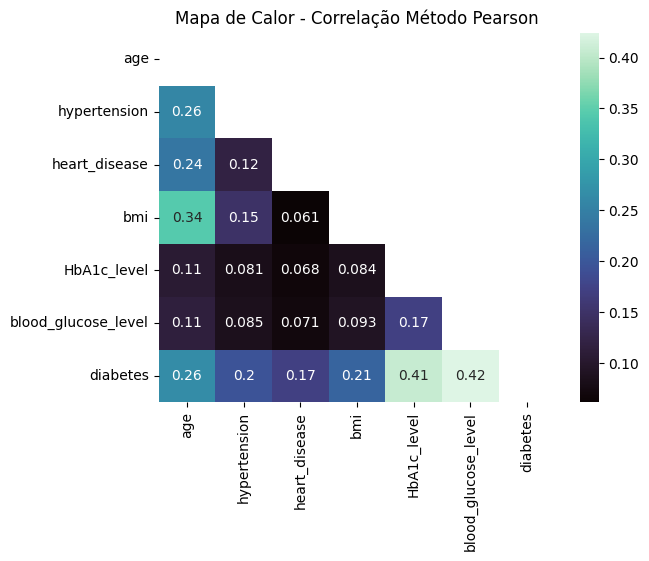

In [ ]:
corr_df =  data.corr(method='pearson',numeric_only=True)
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


ax = sns.heatmap(corr_df,mask=mask_ut, annot=True, cmap='mako')
ax.set(title='Mapa de Calor - Correlação Método Pearson')

[Text(0.5, 1.0, 'Mapa de Calor - Correlação Método Spearman')]

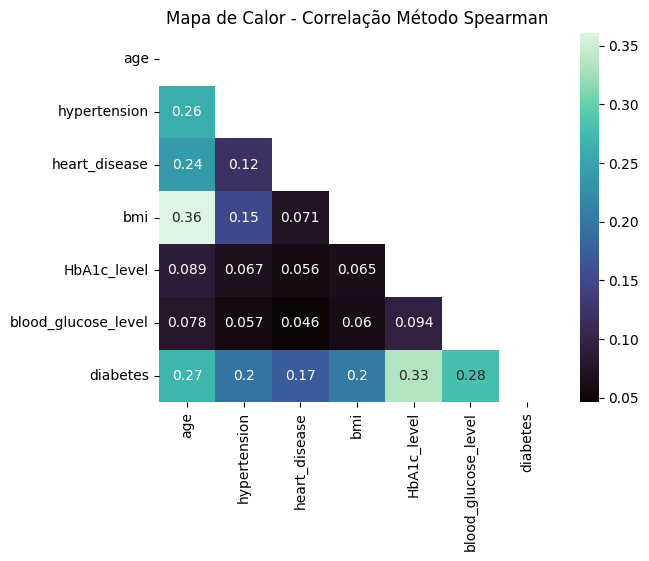

In [ ]:
corr_df =  data.corr(method='spearman',numeric_only=True)
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


ax = sns.heatmap(corr_df,mask=mask_ut, annot=True, cmap='mako')
ax.set(title='Mapa de Calor - Correlação Método Spearman')

Com o Mapa de Calor de correlação podemos ver que não temos variáveis com alta correlação entre si.

As colunas por tipo de dados



*   Numérico - age, bmi, HbA1c_level, blood_glucose_level
*   Categórico - hypertension, heart_disease, diabetes, gender, smoking_history




In [ ]:
numerical = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

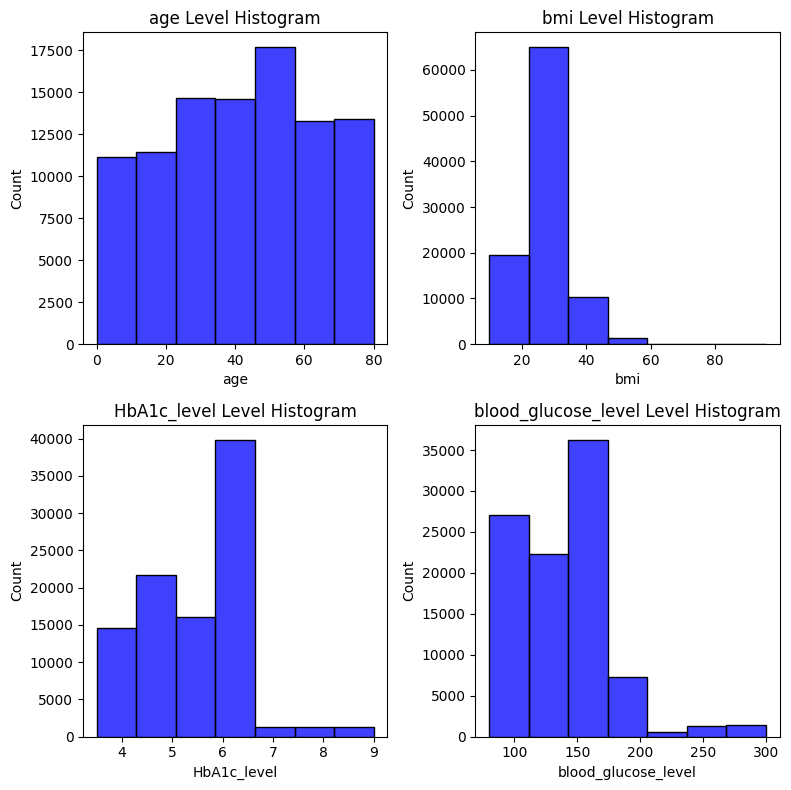

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8), sharex=False)

for variavel, axs in zip(numerical, axes.flatten()):
    sns.histplot(data=data, x=variavel, color = 'b', bins=7, ax=axs)
    axs.set(title=variavel+' Level Histogram')


plt.tight_layout()
plt.show()


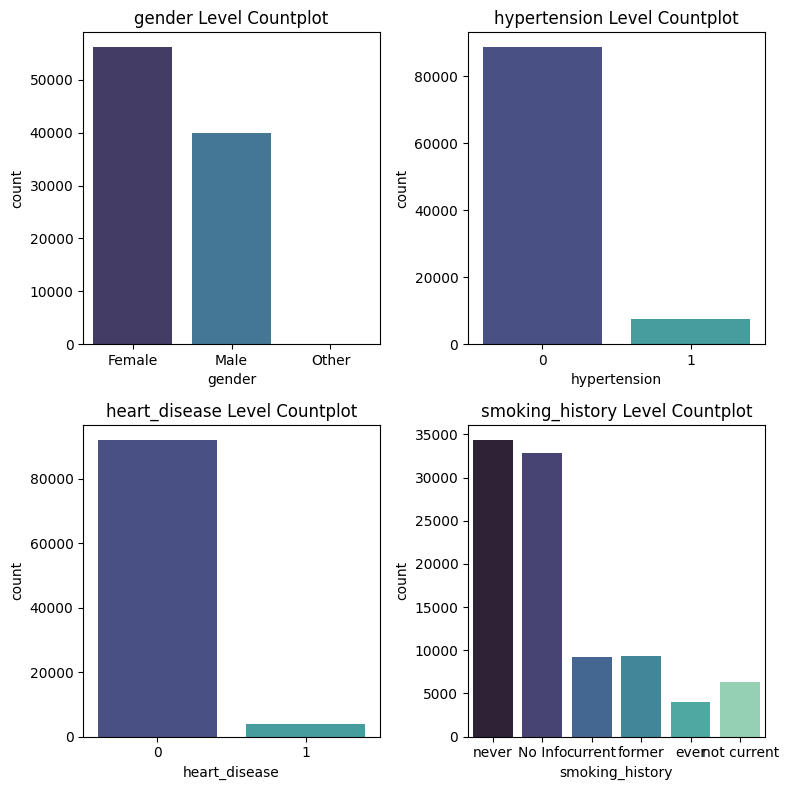

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8), sharex=False)

for variavel, axs in zip(categorical, axes.flatten()):
    sns.countplot(data=data, x=variavel, palette='mako', ax=axs)
    axs.set(title=variavel+' Level Countplot')


plt.tight_layout()
plt.show()

Pontos importantes:


*   Glicose e BMI são distribuições assimétricas a esquerda
*   Idade é uma distribuição achatada
*   Temos um balanceamento entre Homem e mulher
*   Hipertensão e problema no coração é um dado desbalanceado











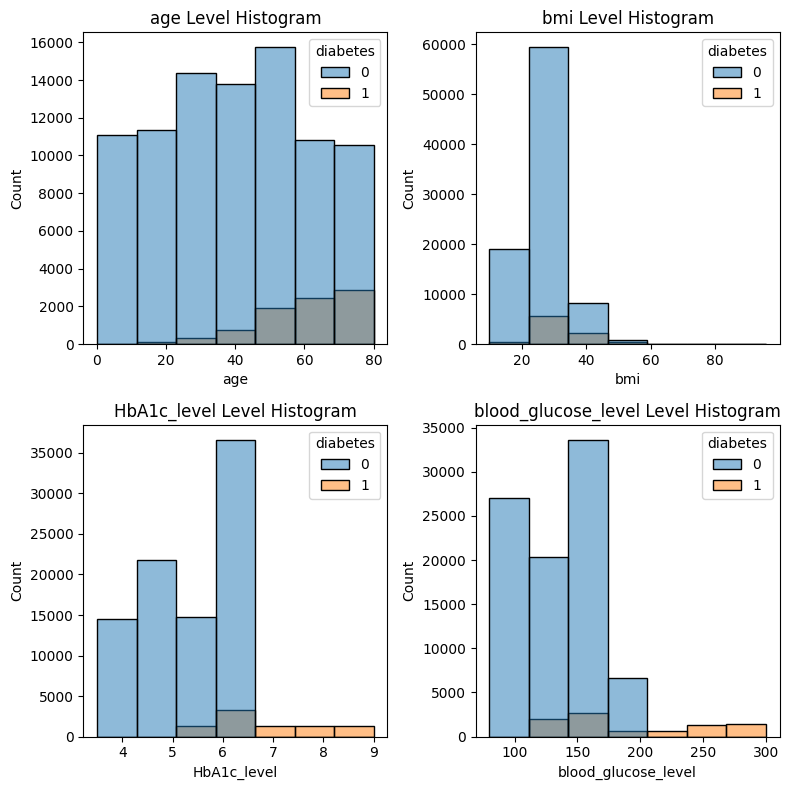

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8), sharex=False)

for variavel, axs in zip(numerical, axes.flatten()):
    sns.histplot(data=data, x=variavel, color = 'b', bins=7, ax=axs, hue='diabetes')
    axs.set(title=variavel+' Level Histogram')


plt.tight_layout()
plt.show()


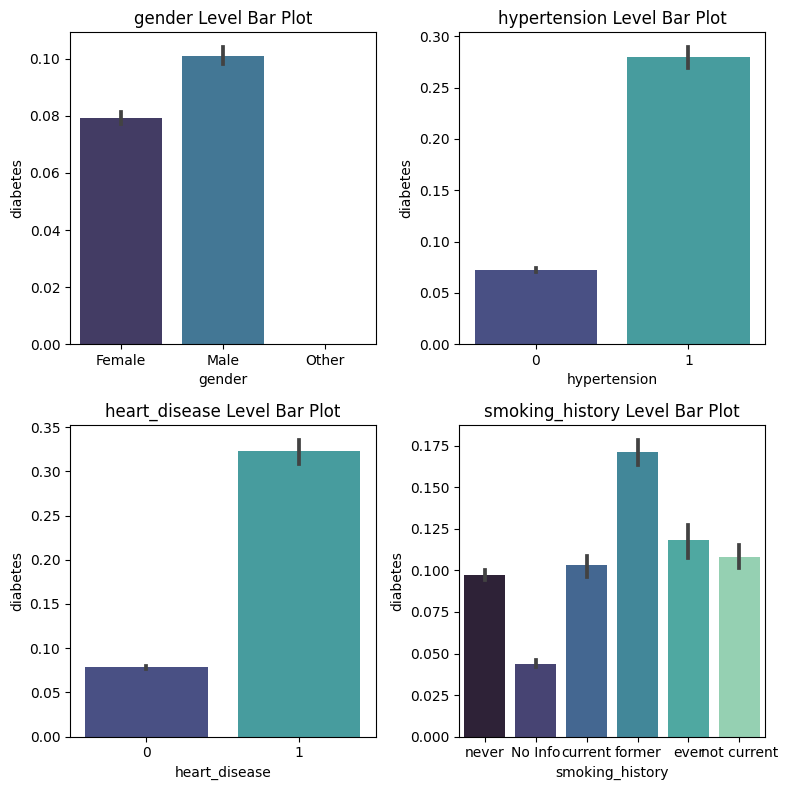

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8), sharex=False)

for variavel, axs in zip(categorical, axes.flatten()):
    sns.barplot(data=data, x=variavel,y='diabetes', palette='mako', ax=axs)
    axs.set(title=variavel+' Level Bar Plot')


plt.tight_layout()
plt.show()

Pontos importantes:


*   Glicose : quanto maior mais diabéticos
* HbA1c : quanto maior mais diabéticos
*   BMI : mantém a mesma distribuição em quem é ou não diabético
*   Idade : conforme a idade avança temos uma maior predominancia de casos de diabetes
*   Homens tem uma leve tendência a ter mais diabetes nesses dados
*   Hipertensão e problema no coração quem possue esses problemas tem uma predominância em ser diabético


### **Separando dados de treino e dados de teste**

Neste passo iremos criar um tratamento maior nos dados, como vimos que temos dados categóricos em texto, catégóricos numéricos e dados númericos. Os dados em texto serão tratados com o LabelEncoder, onde iremos transformá-los em dados numéricos, isso facilitará o teste em diversos tipos de modelos.

Tive que tratar nossa target que ela fosse percebida como um dado binário.

Também definimos neste ponto a separação dos dados de treino e teste com 25% da base para teste e 75% para treino.

Instanciamos o kfold com 10 quebras, foi estratificado para nos auxiliar com os dados desbalanceados.


Definimos também qual métrica de scoring iremos perseguir que será o F1, a qual também auxiliará nosso estudo, já que queremos evitar ser muito assertivo e como temos dados desbalanceados, podemos acabar acertando muito a classe dominante.

In [ ]:
data.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [ ]:
%%time
test_size = 0.25
seed = 89899

# instanciando os encoders
label_encoder_y = LabelEncoder()

#instanciando o tratamento das colunas categóricas em texto
categorical_to_treat = ['gender', 'smoking_history']
one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown = 'error',drop='first'),
                                       categorical_to_treat),
                                      remainder='passthrough')

# adicionando camada de tratamento no y
label_encoder_y = label_encoder_y.fit(data['diabetes'])
y_encoded = label_encoder_y.transform(data['diabetes'])
y = y_encoded.copy()

# Separação em conjuntos de treino e teste
X = data.iloc[:,0:8]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Adicionando tratamento no X_train para variáveis.

X_train_encoder = one_hot_enc.fit(X_train)
X_train = one_hot_enc.transform(X_train)
X_train = pd.DataFrame(X_train, columns=one_hot_enc.get_feature_names_out())
X_train.columns = [w.replace('onehotencoder__', '') for w in X_train.columns]
X_train.columns = [w.replace('remainder__', '') for w in X_train.columns]

# Retornando os dados de treino para formato de array
X_train = X_train.values

# Parâmetros e partições da validação cruzada
scoring = 'f1'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação'''

CPU times: user 194 ms, sys: 11 ms, total: 205 ms
Wall time: 206 ms


#### Redução de dimensionalidade


Iremos testar uma das técnicas para redução de dimensionalidade em nossos dados, para tal, devemos primeiro padronizar os dados a fim de evitar que diferentes ordens de grandeza interfiram no teste.

In [ ]:
#Implementando a padronização nos dados
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
X_train_scaled = scaler.transform(X_train) # aplicação da padronização no conjunto de treino

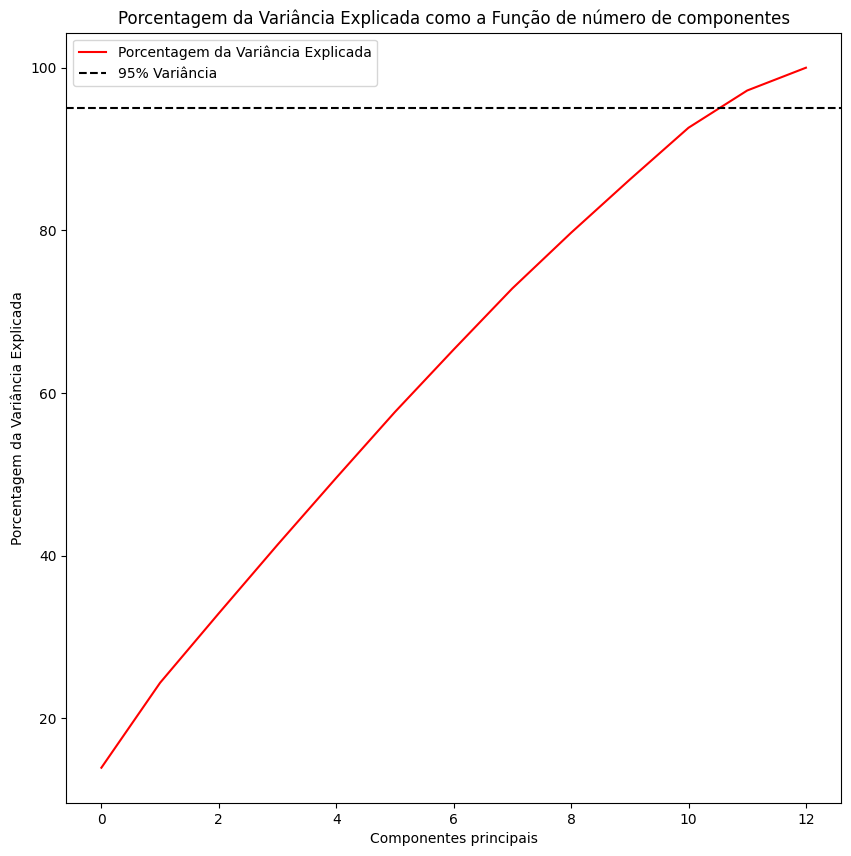

In [ ]:
#Using elbow-plot variance/dimensions
pca = PCA()
pca.fit(X_train_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='Porcentagem da Variância Explicada')
plt.title('Porcentagem da Variância Explicada como a Função de número de componentes')
plt.ylabel('Porcentagem da Variância Explicada')
plt.xlabel('Componentes principais')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Variância')
plt.legend(loc='best')
plt.show()

Conforme podemos verificar os nossos dados só passam do limiar esperado de 95% de variância com 12 componentes, quando estamos no gráfico com 11 componentes (correspondente a 12 das nossas variáveis) como seria reduzir apenas 2 variáveis iremos manter este procedimento fora dos nossos dados.

Logo este trabalho não irá incluir o passo de redução de dimensionalidade.

### **Modelagem**


#### Criação e avaliação de modelos: dados padronizados e normalizados

Neste passo iremos instanciar diversos modelos e formas de tratar os dados, para termos uma escolha inicial, a partir dos modelos iniciais iremos elencar qual modelo iremos selecionar para a hiperparametrização.

In [ ]:

np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


LR-orig: 0.730 (0.015)
KNN-orig: 0.667 (0.017)
CART-orig: 0.718 (0.014)
NB-orig: 0.508 (0.009)
Bag-orig: 0.792 (0.014)
RF-orig: 0.795 (0.014)
ET-orig: 0.780 (0.015)
Ada-orig: 0.805 (0.017)
GB-orig: 0.804 (0.015)
Vot-orig: 0.743 (0.016)
LR-padr: 0.730 (0.013)
KNN-padr: 0.722 (0.010)
CART-padr: 0.716 (0.013)
NB-padr: 0.193 (0.001)
Bag-padr: 0.791 (0.013)
RF-padr: 0.796 (0.014)
ET-padr: 0.780 (0.016)
Ada-padr: 0.805 (0.017)
GB-padr: 0.804 (0.015)
Vot-padr: 0.741 (0.014)
LR-norm: 0.728 (0.014)
KNN-norm: 0.728 (0.018)
CART-norm: 0.719 (0.013)
NB-norm: 0.280 (0.003)
Bag-norm: 0.789 (0.013)
RF-norm: 0.796 (0.015)
ET-norm: 0.780 (0.013)
Ada-norm: 0.805 (0.017)
GB-norm: 0.804 (0.015)
Vot-norm: 0.739 (0.015)


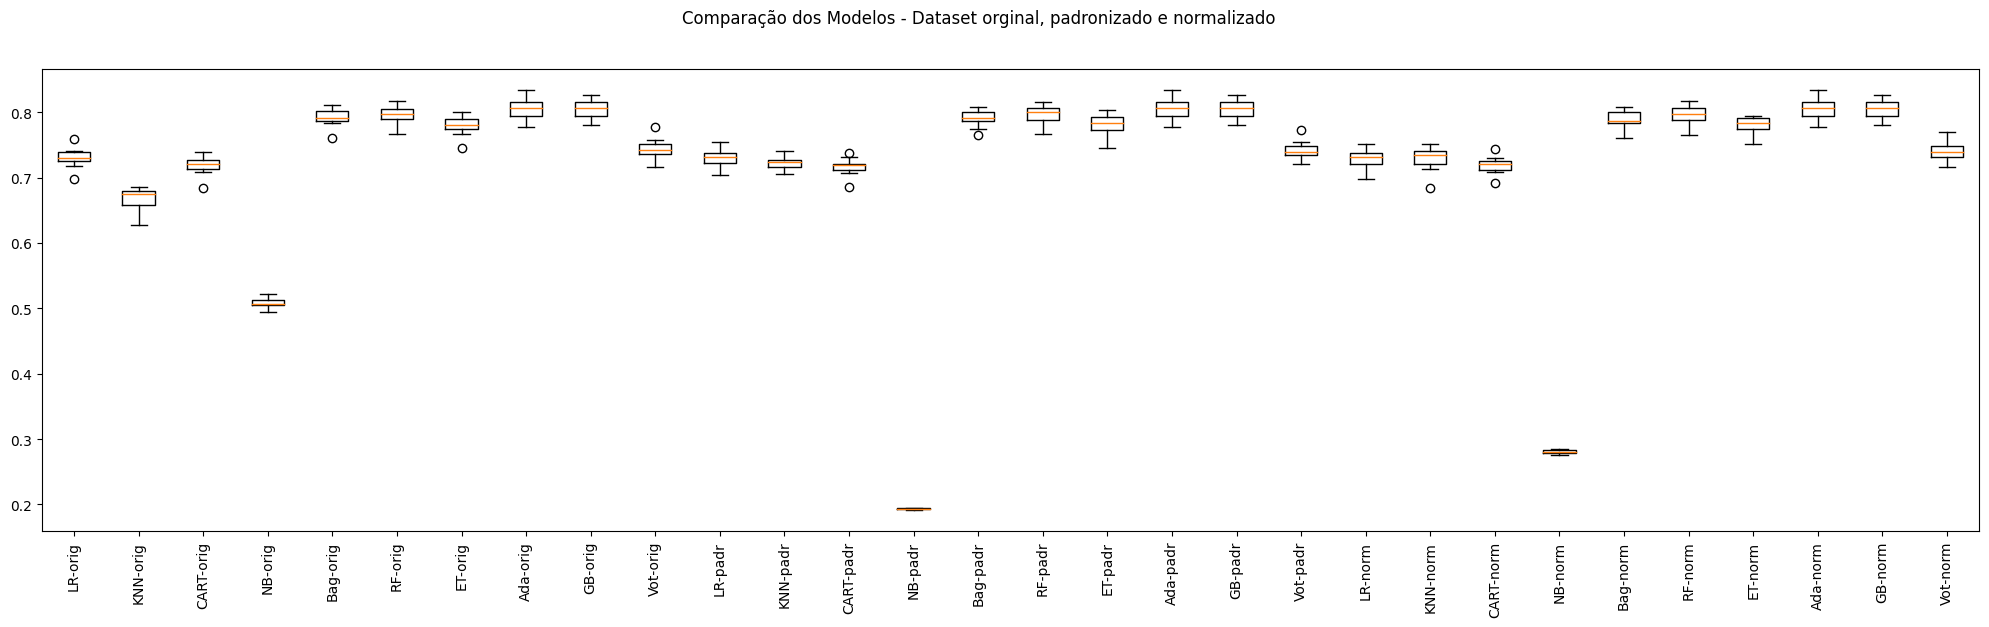

CPU times: user 20min 16s, sys: 29.9 s, total: 20min 46s
Wall time: 20min 21s


In [ ]:
%%time
np.random.seed(7) # definindo uma semente global para este bloco



# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Quando comparamos os baselines e os testes com padronização e normalização os modelos ADA e GradientBoostingClassifier foram os que sairam melhores.

Como temos um menor desvio padrão no GradientBoostingClassifier, este será nosso modelo que iremos estudar os hiperparâmetros.

Selecionei o Optuna por ser um dos métodos que são mais utilizados hoje em dia nas competições, ele tem uma velocidade um pouco maior e uma facilidade de setarmos diversos parâmetros a serem testados em funções. Uma vantagem também é que podemos parar o estudo sem perder o que foi processado.


A fim de evitar caso aumente-se a base de treino com novos dados, irei retirar algum viés que possamos incrementar e piorar a performance do modelo com a inclusão e outliers, adicionei a padronização nos dados de treino.

In [ ]:
def objective(trial, X, y, cv, scoring):
  """
  An objective function to tune hyperparameters of Gradient Boosting Classifier.
  Args:
    trial: an Optuna trial
    X: DataFrame object, features
    y: Series object, Labels
    cv: k folds to cross-validate
    scoring: String, evaluation metric
  Return:
    Mean test accuracy
  """
  # setando os parâmetros a serem testados
  params = {
    "n_estimators": trial.suggest_int("n_estimators", 1, 1000, step = 100),
    "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.3, log = True),
    "max_depth": trial.suggest_int("max_depth", 3, 9),
    "subsample": trial.suggest_float("subsample", 0.5, 0.9, step = 0.1),
    "max_features": trial.suggest_categorical("max_features", ["auto", "sqrt", "log2"]),
    "random_state": seed,
    }
  # Selecionanddo o modelo
  gb_class = GradientBoostingClassifier(**params)

  # Calculando o score
  scores = cross_val_score(gb_class, X, y, cv=cv, scoring=scoring, n_jobs = -1)
  f1 = scores.mean()

  return f1

In [ ]:
study = optuna.create_study(direction = "maximize")


func = lambda trial: objective(trial, X_train_scaled, y_train, cv = kfold, scoring = "f1")

[I 2023-06-09 20:00:56,172] A new study created in memory with name: no-name-a32ca81f-ff1c-4774-9486-3ba430cf1886


In [ ]:
%%time
# Iniciando otimização com 100 tentativas
study.optimize(func, n_trials = 100)

[I 2023-06-09 20:07:13,986] Trial 0 finished with value: 0.8049460828406364 and parameters: {'n_estimators': 901, 'learning_rate': 0.004997166000891895, 'max_depth': 6, 'subsample': 0.7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8049460828406364.
[I 2023-06-09 20:09:57,715] Trial 1 finished with value: 0.7924804229188143 and parameters: {'n_estimators': 301, 'learning_rate': 0.15611470241769185, 'max_depth': 7, 'subsample': 0.9, 'max_features': 'log2'}. Best is trial 0 with value: 0.8049460828406364.
[I 2023-06-09 20:18:15,766] Trial 2 finished with value: 0.7989804236063061 and parameters: {'n_estimators': 501, 'learning_rate': 0.001571358975960064, 'max_depth': 6, 'subsample': 0.8, 'max_features': 'auto'}. Best is trial 0 with value: 0.8049460828406364.
[I 2023-06-09 20:21:13,598] Trial 3 finished with value: 0.29284416684566605 and parameters: {'n_estimators': 701, 'learning_rate': 0.0011291124099320905, 'max_depth': 3, 'subsample': 0.7, 'max_features': 'sqrt'}. Best is

CPU times: user 1min 52s, sys: 12.3 s, total: 2min 4s
Wall time: 5h 50min


In [ ]:
print(f"Number of finished trials: {len(study.trials)}")

Number of finished trials: 100


In [ ]:
trial = study.best_trial
print("Highest f1: {:.2f}%.".format(trial.value * 100))

Highest f1: 80.75%.


In [ ]:
print("Params:")
for key, value in trial.params.items():
    print(f"\t{key}: {value}")

Params:
	n_estimators: 401
	learning_rate: 0.05167335326978981
	max_depth: 3
	subsample: 0.6
	max_features: log2


In [ ]:
plot_param_importances(study)

In [ ]:
best_gbc = GradientBoostingClassifier(n_estimators = 401
                                      ,learning_rate = 0.05167335326978981
                                      ,max_depth = 3
                                      ,subsample = 0.6
                                      ,max_features = 'log2'
                                      )

In [ ]:
best_gbc

GradientBoostingClassifier(learning_rate=0.03893790142022774,
                           max_features='auto', n_estimators=801,
                           subsample=0.6)

In [ ]:
# Treinando o com todo o conjunto de treino
best_gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.05167335326978981,
                           max_features='log2', n_estimators=401,
                           subsample=0.6)

#### Aplicando transformação nos dados de teste

In [ ]:
X_test = one_hot_enc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=one_hot_enc.get_feature_names_out())
X_test.columns = [w.replace('onehotencoder__', '') for w in X_train.columns]
X_test.columns = [w.replace('remainder__', '') for w in X_train.columns]


In [ ]:
# Adicionando tratamento no X_test para variáveis.
X_test = one_hot_enc.transform(X_test)
X_test = pd.DataFrame(X_test, columns=one_hot_enc.get_feature_names_out())
X_test.columns = [w.replace('onehotencoder__', '') for w in X_test.columns]
X_test.columns = [w.replace('remainder__', '') for w in X_test.columns]

# Retornando os dados de treino para formato de array
X_test = X_test.values

# Parametrizando o conjunto de teste
X_test_scaled = scaler.transform(X_test)


### Testando nosso modelo escolhido

In [ ]:
# Fazendo as predições com o conjunto de teste
predictions = best_gbc.predict(X_test_scaled)

# Estimando o MSE e o RMSE no conjunto de teste

print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions))

0.9713774597495528
0.8100496963003866


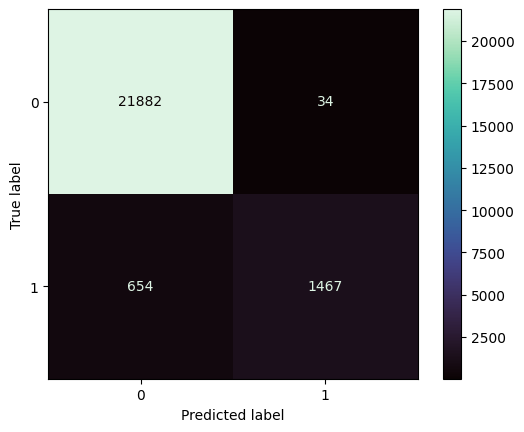

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='mako')

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21916
           1       0.98      0.69      0.81      2121

    accuracy                           0.97     24037
   macro avg       0.97      0.85      0.90     24037
weighted avg       0.97      0.97      0.97     24037



No fim nosso modelo com hyperparâmetros refinados teve um leve aumento no f1-score quando aplicamos ao teste. Não foi um ganho relevante, apesar de deixar refinado o estudo.

Pontos de melhoria que podemos aplicar neste caso seria buscar tratamentos nas nossas varáveis, trazer novas variáveis e avaliar quais seriam importantes.